In [1]:
import ema as em
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
from scipy.optimize import brentq

# Problem 3

In [2]:
mdl = em.Model(2,3)
n = mdl.dnodes
e = mdl.delems
mdl.material('default', 1000)
mdl.xsection('default', 1000000000, 50)
xt = mdl.xsection('truss', 20, 1)

mdl.node('1',  0.0, 0.0)
mdl.node('2',  8.0, 0.0)
mdl.node('3',  8.0, 6.0)
mdl.node('4', 16.0, 6.0)

mdl.beam('a', n['1'], n['2'])
mdl.beam('b', n['2'], n['3'])
mdl.beam('c', n['3'], n['4'])
mdl.truss('d', n['2'], n['4'], xsec=xt)



mdl.fix(n['1'], ['y'])
mdl.fix(n['4'], ['x', 'y', 'rz'])

mdl.numDOF();

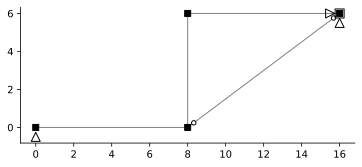

In [3]:
fig, ax = plt.subplots()
em.plot_structure(mdl, ax)

In [4]:
mdl.redundant(e['c'], '3')
mdl.redundant(e['d'], '1')
k0 = 1.5e-3
DL = 0.003
e['a'].e0['2'] = -k0
e['b'].e0['2'] =  k0
e['a'].e0['2'] = DL

In [5]:
# B = em.B_matrix(mdl).remove('a_1').remove('b_1').remove('c_1')
# B.o
B = em.B_matrix(mdl)
A = em.A_matrix(mdl)

In [6]:
B.barx

,$c_3$,$d_1$
$a_1$,0.0000,0.0
$a_2$,0.0000,0.0
$a_3$,0.5000,0.0
$b_1$,-0.0625,-0.6
$b_2$,-0.5000,-0.0
$b_3$,0.5000,-4.8
$c_1$,0.0000,-0.8
$c_2$,-0.5000,4.8
$c_3$,1.0000,0.0
$d_1$,0.0000,1.0


In [7]:
def f(DL):
    e['a'].e0['2'] = DL/10
    Uf = em.analysis.SolveDispl(mdl)
    Q0 = em.Q0_vector(mdl)
#     Ks = em.K_matrix(mdl).s
    Ks = em.Ks_matrix(mdl)
    Ve = A.f@Uf
    Q = Ks@Ve + Q0
    return (Q[2] -40.1)
brentq(f, -1, 1)

-0.03679624078803301

## Part 1

In [8]:
Uf = em.analysis.SolveDispl(mdl)
Q0 = em.Q0_vector(mdl)
Ks = em.K_matrix(mdl).s
# Fs = em.Fs_matrix(mdl)
Ve = A.f@Uf
Q = Ks@Ve + Q0
Q

,$Vector_{{fffffffffffff}}$
$a_{1}$,0.000000e+00
$a_{2}$,-6.000000e-14
$a_{3}$,4.010000e+01
$b_{1}$,-1.716463e+01
$b_{2}$,-4.010000e+01
$b_{3}$,-5.711702e+01
$c_{1}$,-1.620284e+01
$c_{2}$,5.711702e+01
$c_{3}$,8.020000e+01
$d_{1}$,2.025355e+01


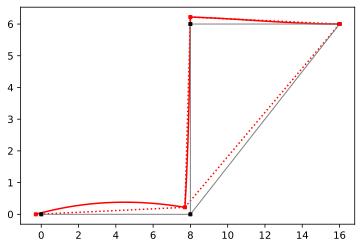

In [9]:
em.plot_U(mdl, Uf, ax)